# Lab 4 - part2
### Edge Detection

https://github.com/scikit-image/scikit-image/blob/master/skimage/filters/edges.py

http://scikit-image.org/docs/0.11.x/auto_examples/plot_edge_filter.html

http://scikit-image.org/docs/dev/auto_examples/edges/plot_canny.html



In [11]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
'''
1. Built-in Sobel, Prewill, Roberts
2. Custom Sobel (V-H-Both)
3. Custom LoG

'''


'\n1. Built-in Sobel, Prewill, Roberts\n2. Custom Sobel (V-H-Both)\n3. Custom LoG\n\n'

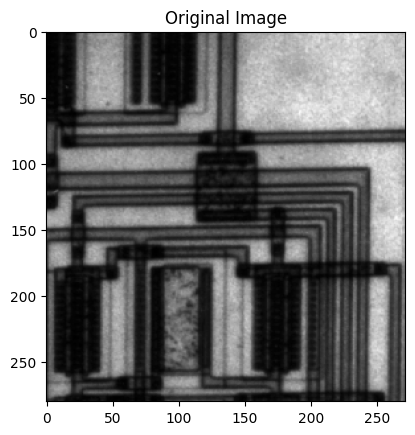

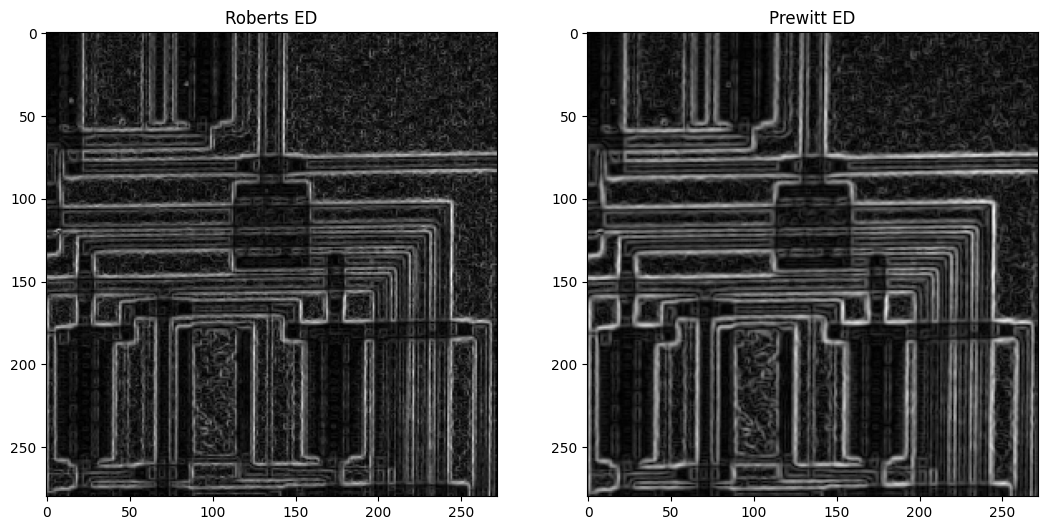

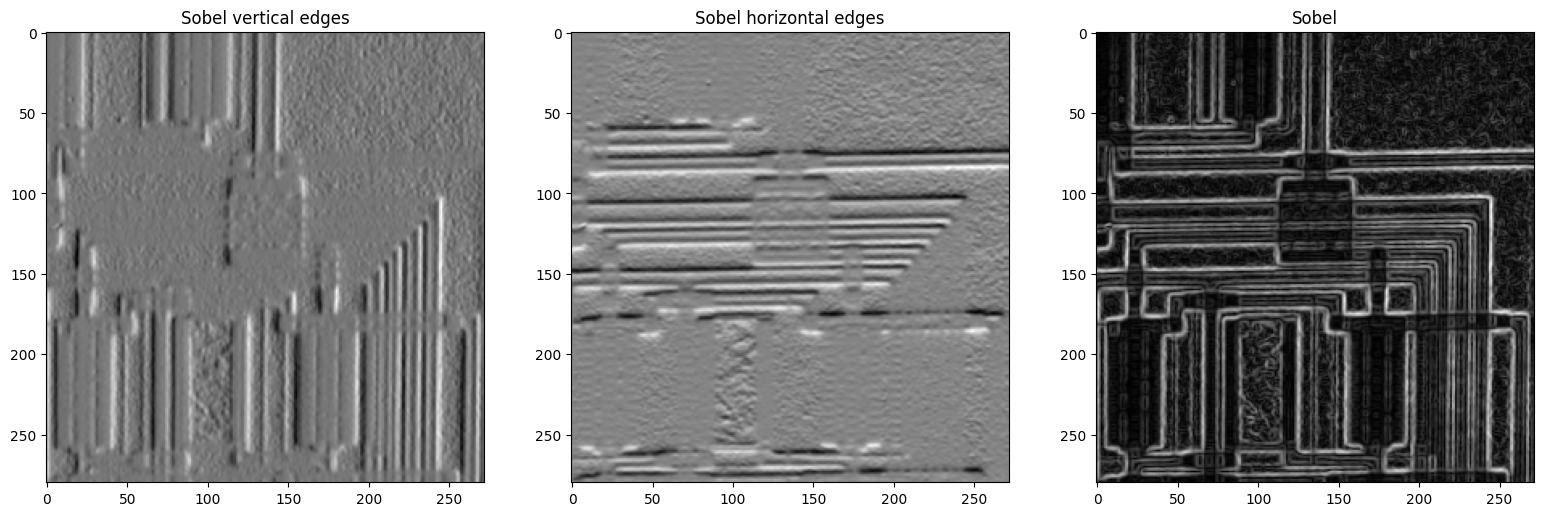

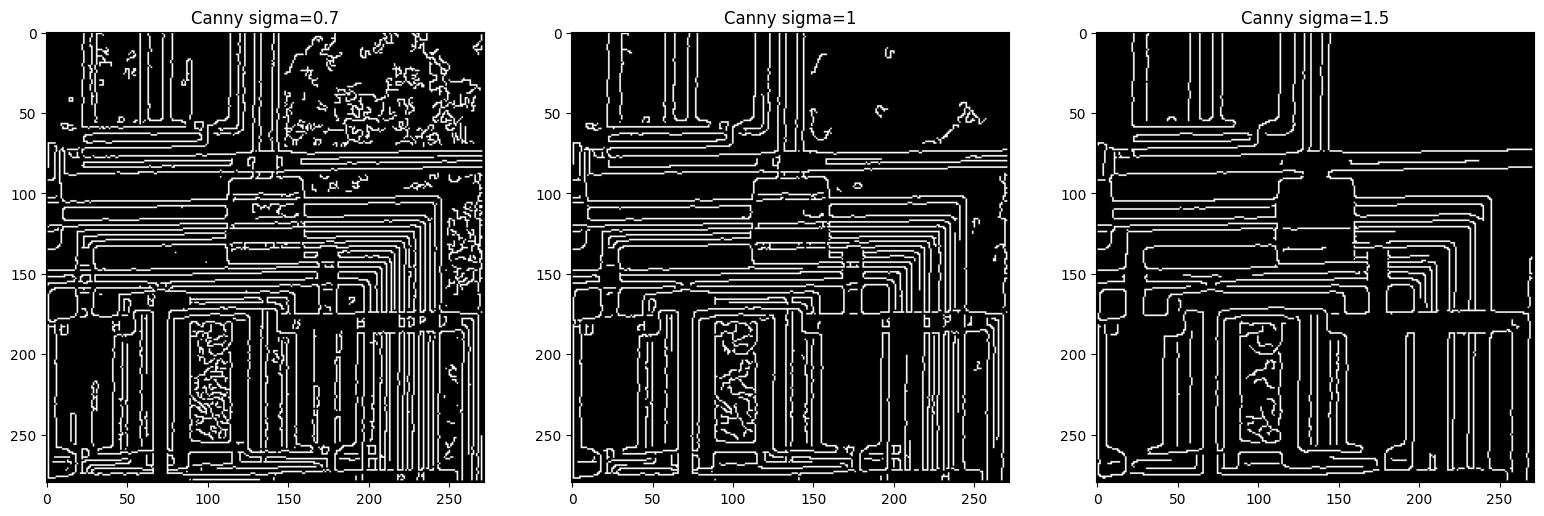

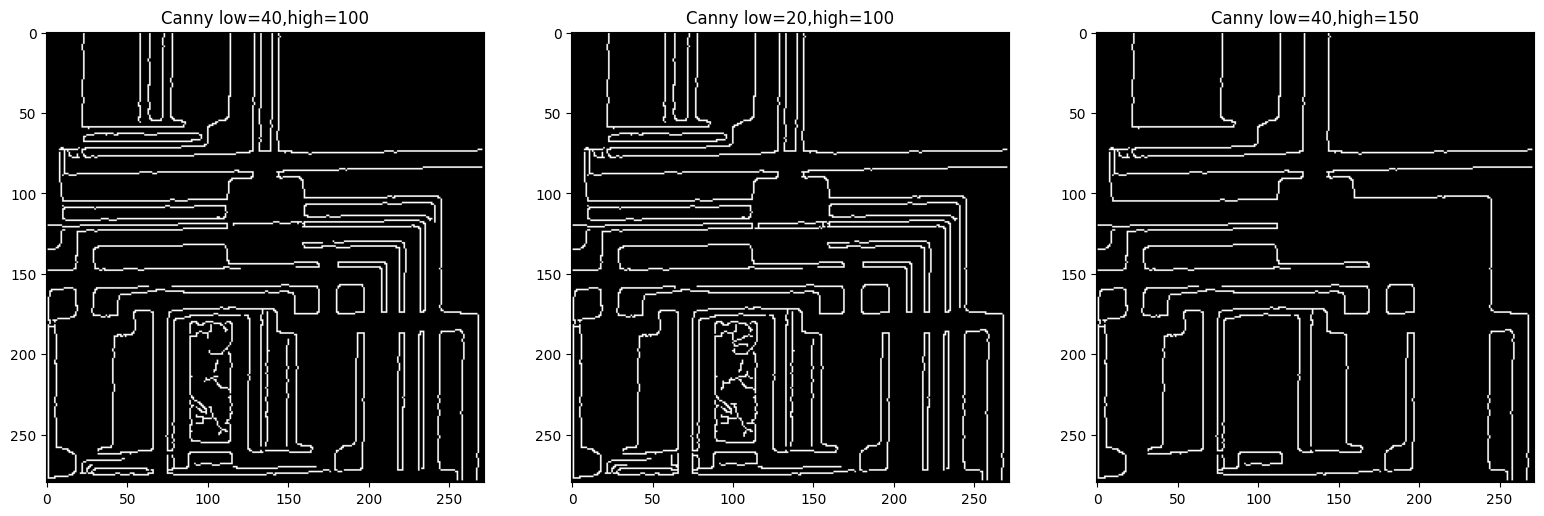

In [13]:
# 1. Built-in Sobel, Prewill, Roberts, Canny
img = io.imread('circuit.tif', as_gray=True)


prewittImg = prewitt(img)

robertsImg = roberts(img)

sobelImg = sobel(img)
sobelvImg = sobel_v(img)
sobelhImg = sobel_h(img)

cannyImg1 = canny(img, sigma=0.7)
cannyImg2 = canny(img, sigma=1)
cannyImg3 = canny(img, sigma=1.5)

cannyThres1 = canny(img, sigma=1, low_threshold=40, high_threshold=100)
cannyThres2 = canny(img, sigma=1, low_threshold=20, high_threshold=100)
cannyThres3 = canny(img, sigma=1, low_threshold=40, high_threshold=150)


show_images([img], ["Original Image"])
show_images([robertsImg, prewittImg], ["Roberts ED", "Prewitt ED"])
show_images([sobelvImg, sobelhImg, sobelImg], ["Sobel vertical edges", "Sobel horizontal edges", "Sobel"])

show_images([cannyImg1, cannyImg2, cannyImg3], ["Canny sigma=0.7", "Canny sigma=1", "Canny sigma=1.5"])
show_images([cannyThres1, cannyThres2, cannyThres3], ["Canny low=40,high=100", "Canny low=20,high=100", "Canny low=40,high=150"])


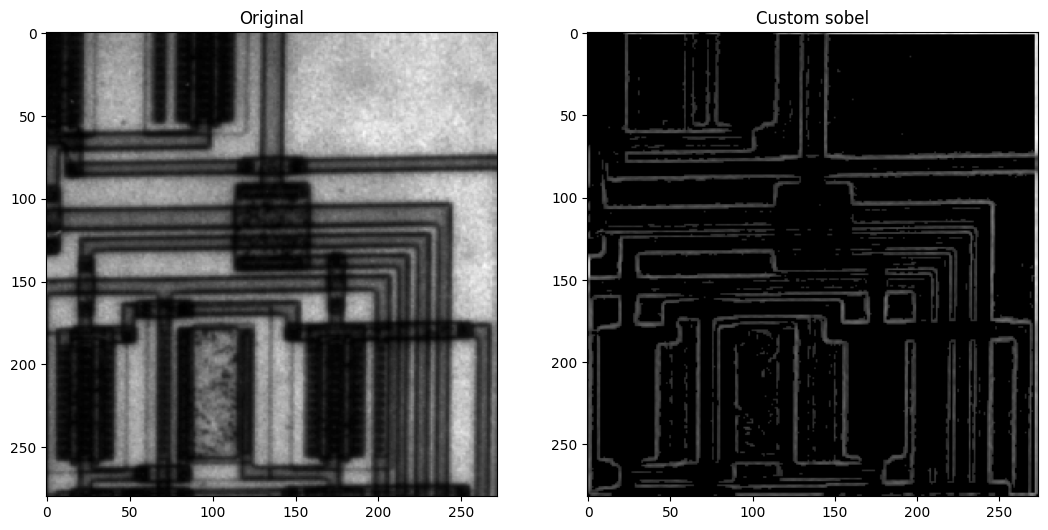

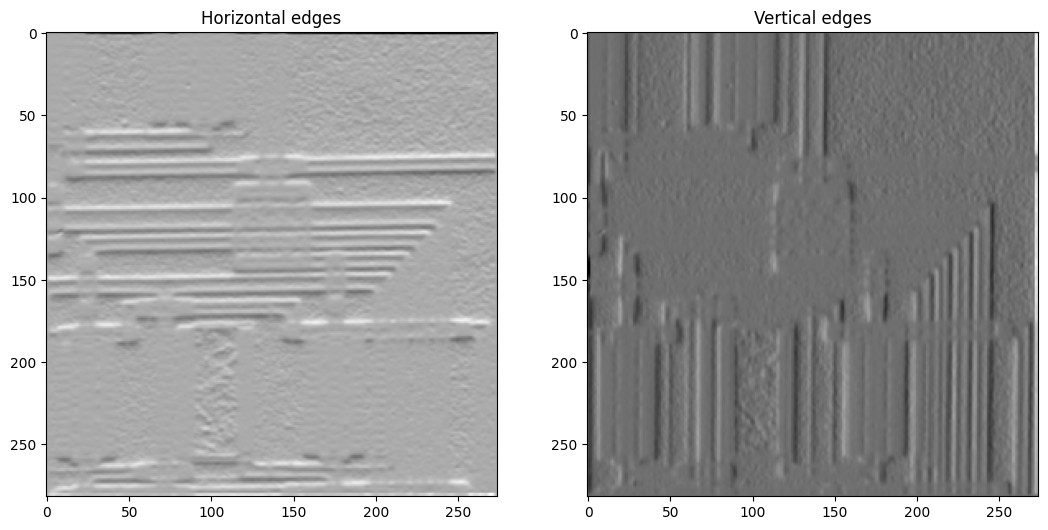

In [14]:
# 2. Custom Sobel (V-H-Both)

def customSobel(img, threshold=None):
	#create the filters
	hy = np.array([
			[-1,0,1],
			[-2,0,2],
			[-1,0,1]
	])

	hx = np.array([
			[-1,-2,-1],
			[0, 0, 0],
			[1, 2, 1]
	]) 

	x_image = convolve2d(img, hx)
	y_image = convolve2d(img, hy)
	xy_image = np.sqrt(x_image**2 + y_image**2)

	if (threshold != None):
		xy_image[xy_image < threshold] = 0

	return x_image, y_image, xy_image


imgX, imgY, filteredImage = customSobel(img, 110)

show_images([img, filteredImage], ["Original", "Custom sobel"])
show_images([imgX, imgY], ["Horizontal edges", "Vertical edges"])

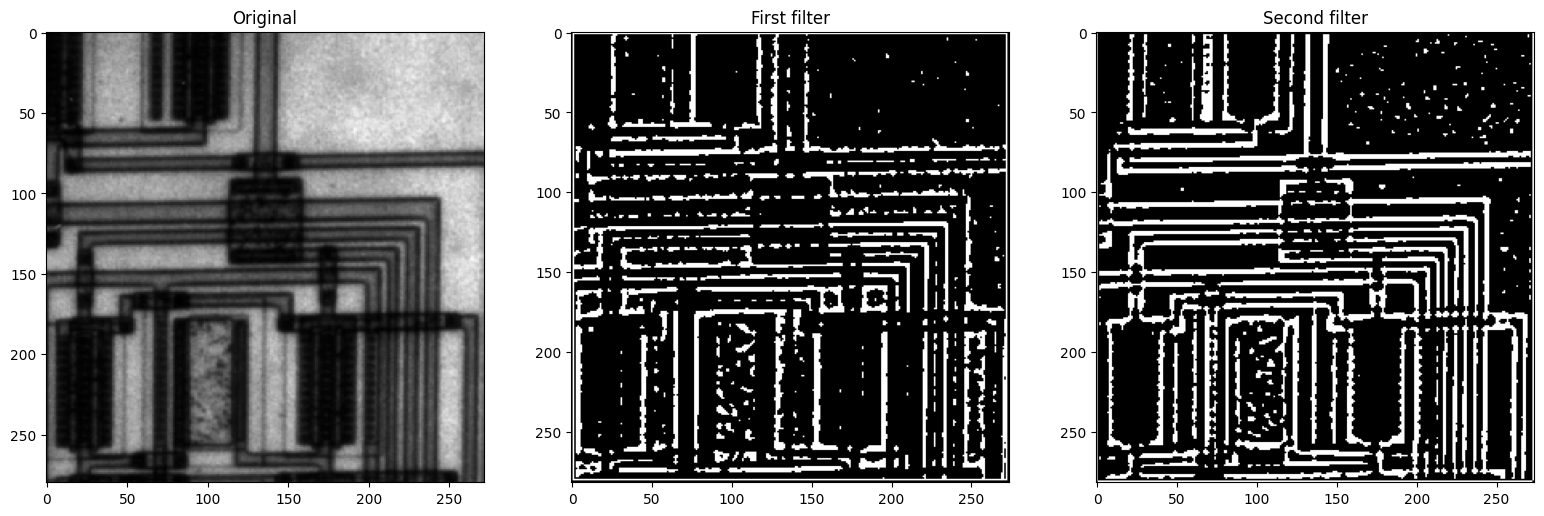

In [47]:
# 3. Custom LoG

def customLOG(img, sigma, threshold=None):
	gaus_img = gaussian(img, sigma=sigma)

	f1 = np.array([ [-1,-1,-1],
									[-1,8,-1 ],
									[-1,-1,-1]])

	f2 = np.array([ [0,1,0],
									[1,-4,1],
									[0,1,0]])


	img_LoG_1 = convolve2d(gaus_img, f1)
	img_LoG_2 = convolve2d(gaus_img, f2)

	img_LoG_1 = (img_LoG_1/img_LoG_1.max()) * 255
	img_LoG_2 = (img_LoG_2/img_LoG_2.max()) * 255

	if (threshold != None):
		img_LoG_1[img_LoG_1 < threshold] = 0
		img_LoG_2[img_LoG_2 < threshold] = 0
		img_LoG_1[img_LoG_1 > threshold] = 1
		img_LoG_2[img_LoG_2 > threshold] = 1

	return img_LoG_1, img_LoG_2

filter1, filter2 = customLOG(img, 1.4, 4)
show_images([img, filter1, filter2], ["Original", "First filter", "Second filter"])


In [16]:
'''
Optional
1-Make edge detection
2-Multiply by factor < 1
3-Subtract (Orginal Image) - (Edge Detection Image)
'''


'\nOptional\n1-Make edge detection\n2-Multiply by factor < 1\n3-Subtract (Orginal Image) - (Edge Detection Image)\n'